In [ ]:
# Шаг 1. Задать нейронную сеть из трёх нейронов, как на слайде 15 (весы в данном шаге)
import numpy as np

w1 = np.random.rand()*0.1
w2 = np.random.rand()*0.1
w3 = np.random.rand()*0.1
w4 = np.random.rand()*0.1

In [ ]:
# Шаг 2. Задать сигмоиду как активационную функцию только к последнему нейрону. В первом слое активационная функция a(x) = x.
def sigmoida(x):
  return 1 / (1 + np.exp(-x))
def forward_pass(X):
    x_coords = X[:, 0]
    y_coords = X[:, 1]

    f1 = w1 * x_coords
    f2 = w2 * y_coords
    f3 = w3 * f1 + w4 * f2
    out = sigmoida(f3)

    return out, f1, f2, f3 # выходные содержат 1500 знач, тк X был 1500*2

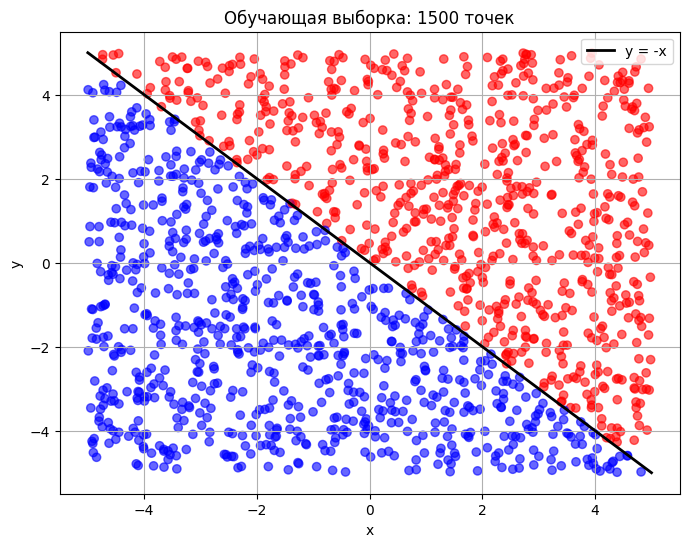

In [ ]:
# Шаг 3. Сгенерировать 1000 - 10000 (много) точек для обучающей выборки.
import matplotlib.pyplot as plt

N_train = 1500
X_train = np.random.uniform(-5, 5, (N_train, 2))  # 1500 точек в диапазоне [-5, 5]
y_train = (X_train[:, 1] > -X_train[:, 0]).astype(float) #это массив, состоящий из true false изначально, но после приведенный к 1 и 0.
# типа беру пару x y и смотрю выше ли точка или ниже прямой.

# Визуал
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.6)
plt.plot([-5, 5], [5, -5], 'k-', linewidth=2, label='y = -x')
plt.title('Обучающая выборка: 1500 точек')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Шаг 4. Обучить на этой выборке сеть, используя выведенную формулу градиента и формулу. Коэффициент лямбда подобрать
lb = 0.0001
epochs = 1000
losses = []

def sigmoid_deriv(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

for epoch in range(epochs):
    out, f1, f2, f3 = forward_pass(X_train)

    # то, насколько нейросетка ошиблась в своих вычислениях
    """
    вместо возведения в квдарат по сути можно брать модуль от разницы
    полученного и ожидаемого, но в таком случае это не будет таким будто значимым
    просто с модулем разнца между маленькой ( out = 0.1 ) и большой ( out = 1.0 )
    ошимюкой при условной ожидаемой единице будет небольшой.
    если же возводить в квадрат, то разница будет огромной
    поэтому как бы можно и модуль так то, чтобы отрицательного не было
    """
    loss = np.mean((out - y_train)**2)
    losses.append(loss)

    # тут и длаее сначала происходит создание градиентов, поэтому опора на расписанные производные в моем конспекте
    first_part = 2*(out - y_train)*sigmoid_deriv(out)

    # вычисление градиента обернуто в сумму. так как ну просто нельзя сделать столько градиентов, соклько у нас x и y
    g_w1 = np.sum(first_part * w3 * X_train[:, 0])
    g_w2 = np.sum(first_part * w4 * X_train[:, 1])
    g_w3 = np.sum(first_part * f1) # потому что f1 = w1 * x_coords
    g_w4 = np.sum(first_part * f2) # потому что f2 = w2 * y_coords

    # по формуле: w = w - lb*grad
    w1 = w1 - lb * g_w1
    w2 = w2 - lb * g_w2
    w3 = w3 - lb * g_w3
    w4 = w4 - lb * g_w4

    if epoch % 100 == 0:
        print(f"эпоха {epoch}, потери: {loss:.4f}")

print("Обучение все")


эпоха 0, потери: 0.2494
эпоха 100, потери: 0.0591
эпоха 200, потери: 0.0317
эпоха 300, потери: 0.0237
эпоха 400, потери: 0.0196
эпоха 500, потери: 0.0170
эпоха 600, потери: 0.0152
эпоха 700, потери: 0.0138
эпоха 800, потери: 0.0128
эпоха 900, потери: 0.0120
Обучение все


Точность на тестовых данных: 100.0 %


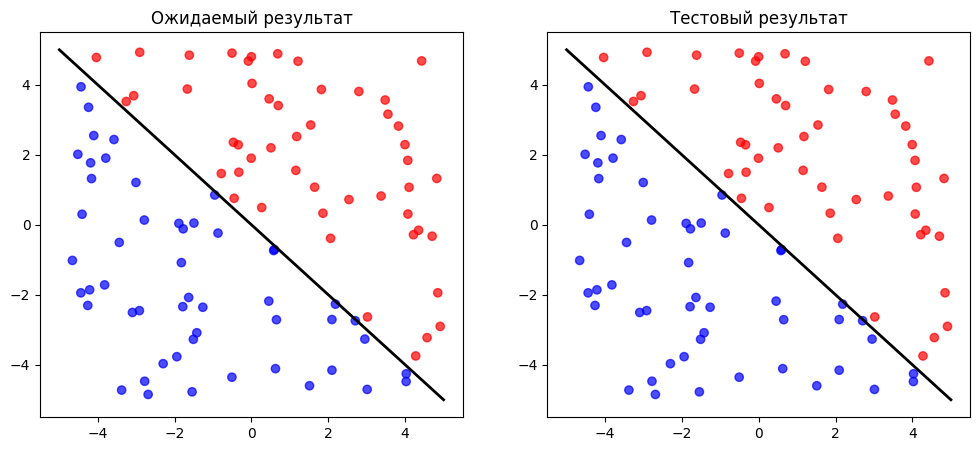

Финальные веса: w1=1.7923, w2=1.8078, w3=1.7924, w4=1.8055


In [ ]:
# Шаг 5. Сгенерировать ещё 100 точек для валидирующей выборки, найти, какую долю из этих точек нейросеть определяет правильно.
N_test = 100
X_test = np.random.uniform(-5, 5, (N_test, 2))
y_test = (X_test[:, 1] > -X_test[:, 0]).astype(float)

f1_test = w1 * X_test[:, 0]
f2_test = w2 * X_test[:, 1]
f3_test = w3 * f1_test + w4 * f2_test
test_predictions = sigmoida(f3_test)
test_predictions_binary = (test_predictions > 0.5).astype(float)
"""
вот тут в общем прогнала все свои 100 новых данных по формулам, полсе чего
вычислила тестовое значение сигмоиды ( от 0 до 1 , где 1 выше ну ты пон)
test_predictions_binary вот это уже массив из true false изщначально,
которые потом конвретировлаись в 1.0 и 0.0
елси результат сигмоиды превышает 0.5, то считается, что точка выше прямой
иначе ниже
"""

accuracy = np.mean(test_predictions_binary == y_test)
# а вот тут как раз поэлементно сравниваем тестовый результат и тот, что должен быть. берем среднее
print(f"Точность на тестовых данных: {accuracy* 100:.1f} %")

#визуалка
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.7)
plt.plot([-5, 5], [5, -5], 'k-', linewidth=2, label='y = -x')
plt.title('Ожидаемый результат')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_predictions_binary, cmap='bwr', alpha=0.7)
plt.plot([-5, 5], [5, -5], 'k-', linewidth=2, label='y = -x')
plt.title('Тестовый результат')


plt.show()

print(f"Финальные веса: w1={w1:.4f}, w2={w2:.4f}, w3={w3:.4f}, w4={w4:.4f}")